<a href="https://colab.research.google.com/github/stevenfox/Clustering_K_Means/blob/master/Task_1_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Unsupervised Learning with K-means and EM for Dog Breed Data Clustering and EDA 

## 1.1 Explain K-Means clustering

*The explanation is covered in the technical report*

## 1.2 Read File

In [1]:
# Load all necessary libaries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("dataset.csv") 
data.head()

,height,tail length,leg length,nose circumference
0,5.151,3.535,1.414,0.202
1,4.949,3.030,1.414,0.202
2,4.747,3.232,1.313,0.202
3,4.646,3.131,1.515,0.202
4,5.050,3.636,1.414,0.202


## 1.3 Exploratory data analysis (EDA) on data

*The detailed analysis is covered in the techinical report*

In [3]:
data.shape

(300, 4)

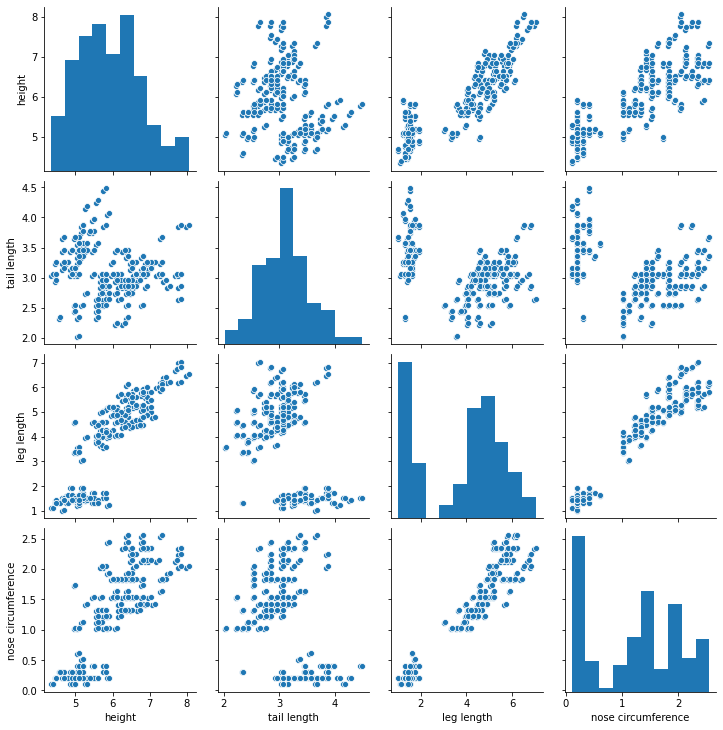

In [4]:
sns.pairplot(data)

In [5]:
data.describe()

,height,tail length,leg length,nose circumference
count,300.000000,300.000000,300.00000,300.000000
mean,5.930983,3.103193,3.81437,1.217323
std,0.839601,0.441935,1.78890,0.772409
min,4.343000,2.020000,1.01000,0.101000
25%,5.202000,2.828000,1.61600,0.305250
50%,5.858000,3.060000,4.41500,1.326000
75%,6.528000,3.366000,5.20200,1.836000
max,8.058000,4.488000,7.03800,2.550000


In [6]:
data = pd.read_csv('dataset.csv').to_numpy()
np.random.shuffle(data) # shuffle rows
data

array([[5.858, 4.04 , 1.212, 0.202],
       [6.868, 3.232, 5.959, 2.323],
       [6.12 , 2.754, 5.202, 1.632],
       ...,
       [6.732, 3.06 , 4.488, 1.428],
       [5.916, 2.856, 5.202, 2.448],
       [6.06 , 3.434, 4.545, 1.616]])

## 1.4 Deployment of K-means and EM clustering algorithms

*The documentation is covered in the technical report*

### K-Means Algorithm: Lloyd’s (Simple)

In [0]:
from timeit import default_timer as timer
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [0]:
# function that plots kmeans clustering 

def plot_kmeans(y_kmeans, centroid, X, ax=None):
    """
    Function that visualises the clusters and the centroids of K-means algorithm. 

    Parameters: 
                y_kmeans = model predictions 
                centroid = model coordinates of the cluster center
                X = dataset 
                ax = Matplot lib figure

    """
    labels = y_kmeans

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis', zorder=2, label='clusters')
    ax.margins(x=0, y=-0.20)
    ax.legend()
    # plot the representation of the K-Means model
    centers = centroid
    ax.scatter(centroid[:, 0], centroid[:, 1], c='r', s=250, alpha=0.4, zorder=2, label='centroid', marker='P')
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [0]:
def kmeans_simple(data, K):
  """
   Function that creates K-means model and returns the following arguments

  Return:
          time = elapsed execution time
          y_kmeans = prediction of the clustering
          centroid = coordinates of the cluster centers 
          distance = euclidean distance that measures 
          the coherence of the clusters, namely sum of square criterion.

  Parameters: 
              data = dataset
              K = number of clusters for K-means

  """


  # start the counting once this method is called
  start = timer() 
  
  #call KMeans algorithm from sklearn lib
  model = KMeans(n_clusters = K)
  #fit the dataset to the KMeans Model
  model.fit(data)
  #store the coordinates of the cluster centers to var centroid
  centroid = model.cluster_centers_
  
  #store the labels of each data point to var labels
  labels = model.labels_
  #store the predictions of closest cluster in each data point that belong to var y_kmeans
  y_kmeans = model.predict(data)

  # store the sum of squared distances of samples to the nearest cluster center to var distance
  distance = model.inertia_ 
       
  end = timer()
  time = 'Elapsed time is %0.3f' % float(end - start), 'seconds'

  return time, y_kmeans, centroid, distance
  


### K = 3


In [10]:
K = 3
time, y_kmeans, centroid, distance = kmeans_simple(data, K)
print(*time)

Elapsed time is 0.044 seconds


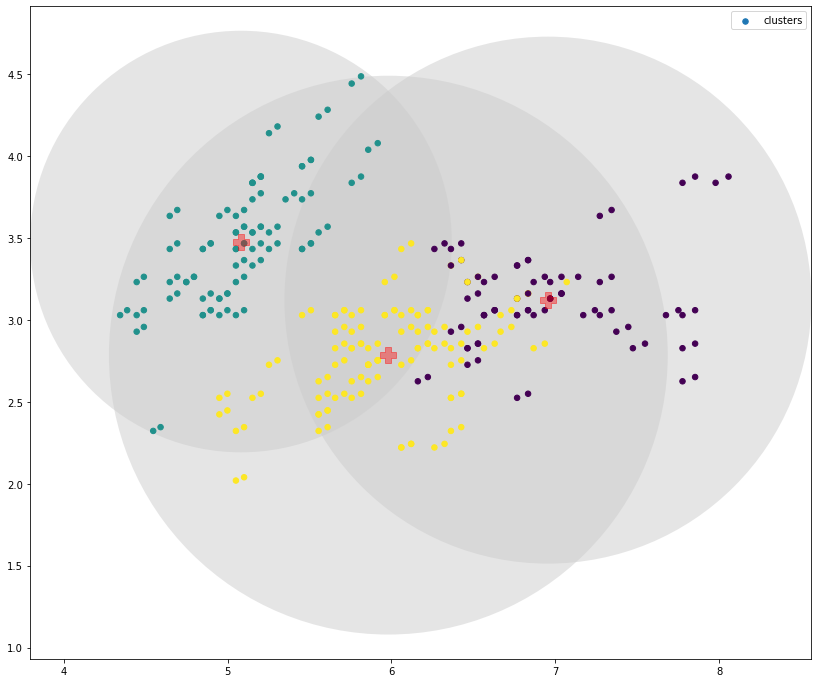

In [11]:
plt.figure(figsize=(14,12))
plot_kmeans(y_kmeans, centroid , data)

### K = 4

In [12]:
K = 4
time, y_kmeans, centroid, distance = kmeans_simple(data, K)
print(*time)

Elapsed time is 0.051 seconds


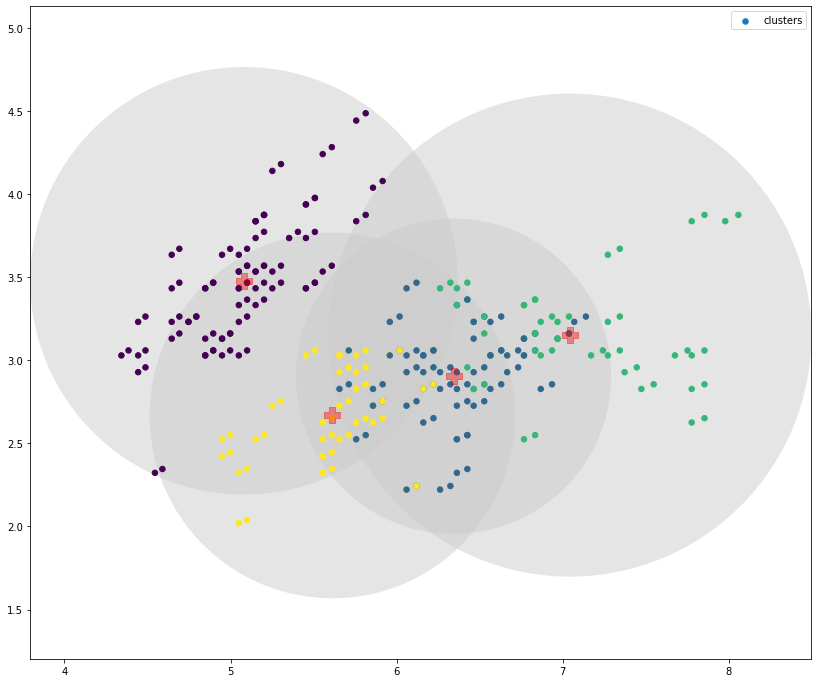

In [13]:
plt.figure(figsize=(14,12))
plot_kmeans(y_kmeans, centroid , data)

### K-Means Algorithm: Expectation–Maximization

In [0]:
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import mean_squared_error

In [0]:
def k_means_EM(data, K, rseed=2):
    
    """
   Function that performs clustering as per the Expectation–maximization (E–M)
   algorithm (simple approach) and returns the following arguments:

      Return:
              time = elapsed execution time
              mse = euclidean distance that measures 
              the coherence of the clusters, namely sum of square criterion.
              distance = distances[i] is the distance between 
              the i-th row in X and the argmin[i]-th row in Y.
              centers = centers from means of all data points
              labels = labels based on closest center

      Parameters: 
                  X = dataset
                  K = number of clusters for K-means E-M
                  r_seed = starting point in generating random numbers (optional)

      """

    
    start = timer()
    
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(data.shape[0])[:K]
    centers = data[i]
    
    # Repeat until is coverged
    while True:
        # E-step
        # 2a. Assign labels based on closest center
        labels, distance = pairwise_distances_argmin_min(data, centers)

        # M-step
        # 2b. Find new centers from means of points
        new_centers = np.array([data[labels == i].mean(0)
                                for i in range(K)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

        # print(labels)
        mse = mean_squared_error(labels, distance)

    end = timer()
    time = 'Elapsed time is %0.3f' % float(end - start), 'seconds'   

    return  time, mse, distance, centers, labels




### K = 3

In [16]:
K = 3
time, mse, _, centers, labels = k_means_EM(data, K)
print(*time)

Elapsed time is 0.013 seconds


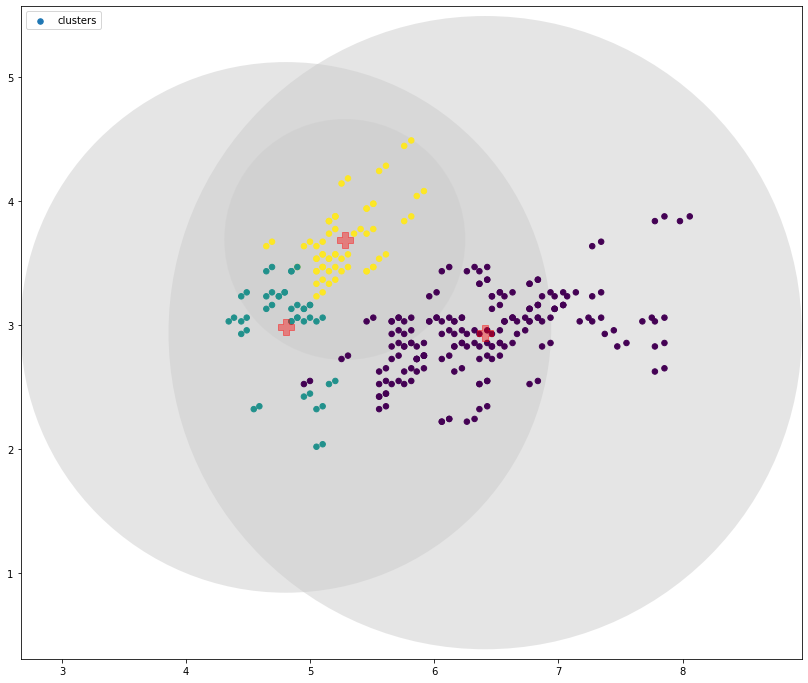

In [17]:
plt.figure(figsize=(14,12))
plot_kmeans(labels, centers , data)

### K = 4

In [18]:
K = 4
time, mse, _, centers, labels = k_means_EM(data, K)
print(*time)

Elapsed time is 0.029 seconds


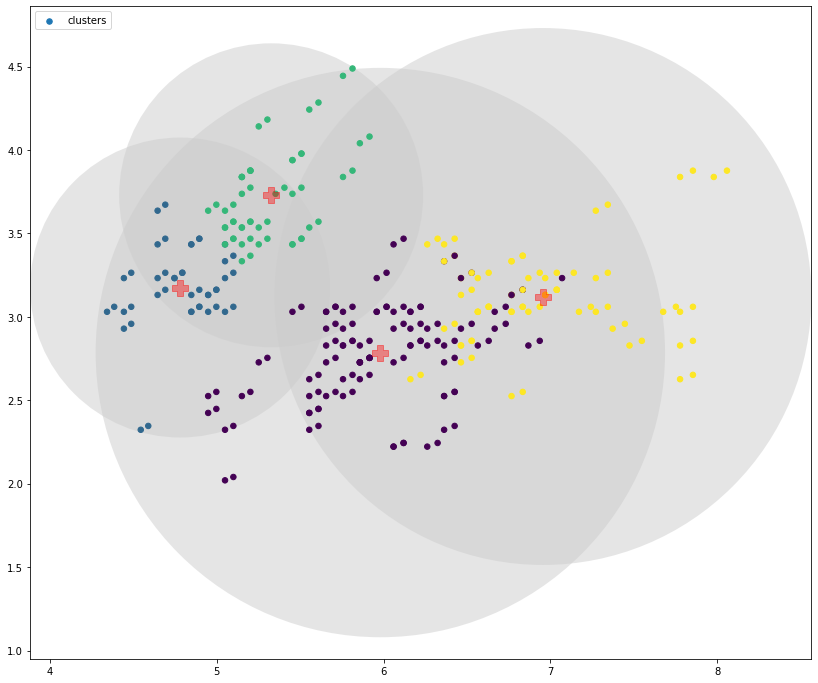

In [19]:
plt.figure(figsize=(14,12))
plot_kmeans(labels, centers , data)

## 1.5 K-Means Performance Evaluation 

*The detailed evaluation is covered in the technical report*

### Manual Elbow Method

In [0]:
def aggregate_distance(data):
  """
  Function to calculate the elbow method.
  Which identifies the most optimal number 
  of clusters with a range of k values 
  for K-means algorithm.

  Returns: 
            all_distance = numpy array that returns the 
            distance vectors of wss

  Parameters: 
              data = dataset

  """
  all_distance = []
  for k in range(1,10):
      vector = []
      vector.append(k)
      _, _, centroid, distance = kmeans_simple(data, k)
      vector.append(distance)
      all_distance.append(np.array(vector))
  return np.array(all_distance)

Text(0, 0.5, 'Sum of squared distance')

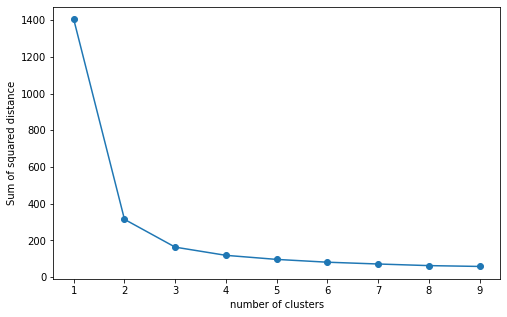

In [21]:
all_distance = aggregate_distance(data)
plt.figure(figsize=(8,5))
plt.plot(all_distance[:,0],all_distance[:,1],'o-')
plt.xlabel('number of clusters')
plt.ylabel('Sum of squared distance')

### Utilising KElbowVisualizer for consistency to the manual elbow method above

In [22]:
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7de777e630>,
                 k=None, metric=None, model=None, timings=True)

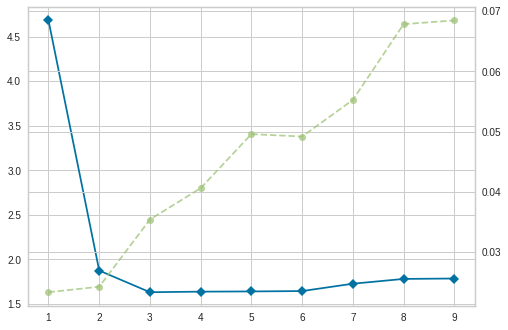

In [23]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data)        # Fit the data to the visualizer

## Elbow Method


In [0]:
def aggregate_distance_em(data):
  """
  Function to calculate the elbow method.
  Which identifies the most optimal number 
  of clusters with a range of k values 
  for K-means algorithm.

  Returns: 
            all_distance = numpy array that returns the 
            distance vectors of wss

  Parameters: 
              data = dataset

  """
  all_distance = []
  for k in range(1,10):
      vector = []
      vector.append(k)
      _, mse, distance, centroid, labels = k_means_EM(data, k)
      vector.append(mse)
      all_distance.append(np.array(vector))
  return np.array(all_distance)

Text(0, 0.5, 'Sum of squared distance')

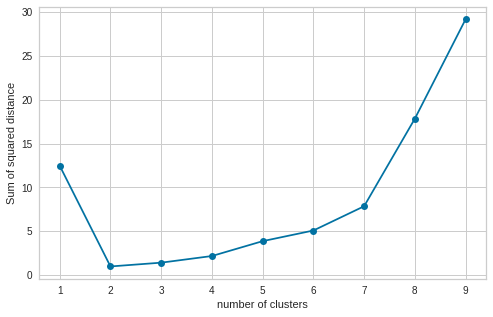

In [25]:
all_distance_em =aggregate_distance_em(data)
plt.figure(figsize=(8,5))
plt.plot(all_distance_em[:,0],all_distance_em[:,1],'o-')
plt.xlabel('number of clusters')
plt.ylabel('Sum of squared distance')

### E–M: Gaussian Mixture Models

### K = 3

In [0]:
from sklearn.mixture import GaussianMixture as GMM


In [0]:
def em_gmm(data, K):
  """
  Function that create GMM model and returns the 
  predictions along with the time that took to
  cluster the data.

  Returns: 
            time = numpy array that returns the 
            labels = predictions of the labels for 
            the data samples in X using trained model

  Parameters: 
              data = dataset
              K = The number of mixture components

  """
  start = timer()
  gmm = GMM(n_components=K).fit(data)
  labels = gmm.predict(data)
  end = timer()
  time = 'Elapsed time is %0.3f' % float(end - start), 'seconds' 
  return time, labels

In [33]:
K= 3 
time , labels = em_gmm(data, K)
print(*time)

Elapsed time is 0.032 seconds


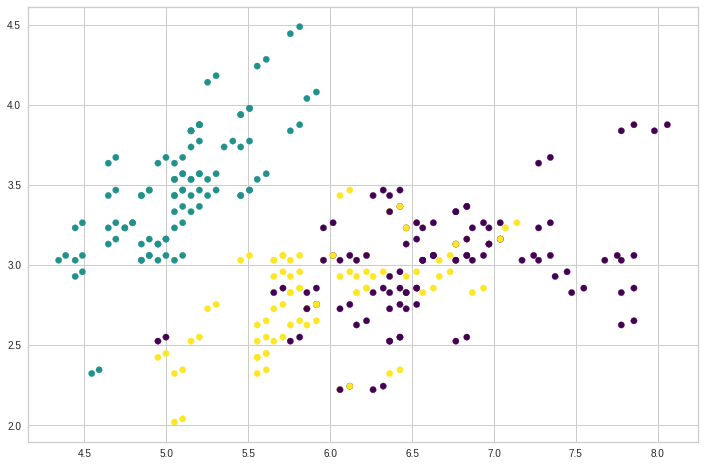

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis');

### K = 4

In [30]:
K= 4 
time , labels = em_gmm(data, K)
print(*time)

Elapsed time is 0.042 seconds


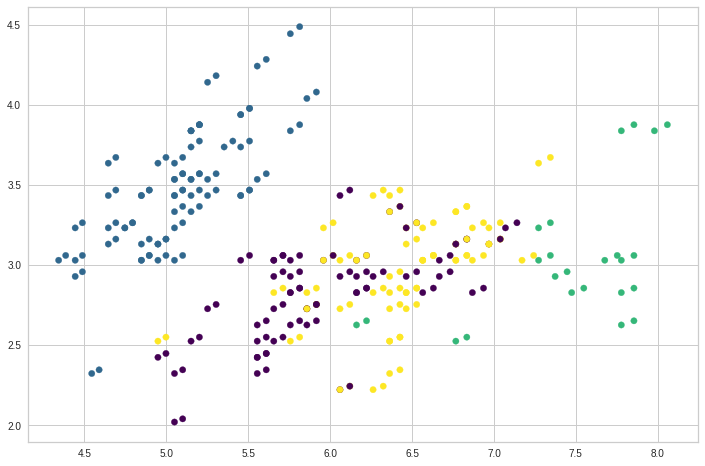

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis');

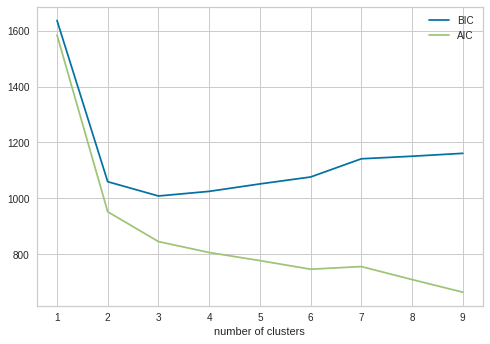

In [32]:
n_components = np.arange(1, 10)
models = [GMM(n, covariance_type='full', random_state=0).fit(data)
          for n in n_components]

plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('number of clusters');